In [46]:
# importar biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
sergipe_df = pd.read_csv('DNSE2017.csv', encoding='utf-8', dtype=str)
sergipe_df.head(3)

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,01,...,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,03,...,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,NaN,...,NaN,3,03042017,06,0,1,NaN,11,0,5


In [48]:
sergipe_df.columns

Index(['contador', 'ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE',
       'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'CODMUNRES', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC',
       'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL',
       'DTCADASTRO', 'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK'],
      dtype='object')

In [49]:
# Transformar em dados quantitativos continuos - medições
sergipe_df['PESO'] = pd.to_numeric(sergipe_df['PESO'])
sergipe_df['IDADEMAE'] = pd.to_numeric(sergipe_df['IDADEMAE'])
sergipe_df['IDADEPAI'] = pd.to_numeric(sergipe_df['IDADEPAI'])
sergipe_df['APGAR1'] = pd.to_numeric(sergipe_df['APGAR1'])
sergipe_df['APGAR5'] = pd.to_numeric(sergipe_df['APGAR5'])

In [121]:
# Transformar em dados quantitativos discretos - contagem

sergipe_df['QTDFILVIVO'] = pd.to_numeric(sergipe_df['QTDFILVIVO']).astype(pd.Int64Dtype())
sergipe_df['QTDFILMORT'] = pd.to_numeric(sergipe_df['QTDFILMORT']).astype(pd.Int64Dtype())
sergipe_df['SEMAGESTAC'] = pd.to_numeric(sergipe_df['SEMAGESTAC']).astype(pd.Int64Dtype())
sergipe_df['CONSPRENAT'] = pd.to_numeric(sergipe_df['CONSPRENAT']).astype(pd.Int64Dtype())
sergipe_df['SERIESCMAE'] = pd.to_numeric(sergipe_df['SERIESCMAE']).astype(pd.Int64Dtype())
sergipe_df['QTDPARTNOR'] = pd.to_numeric(sergipe_df['QTDPARTNOR']).astype(pd.Int64Dtype())
sergipe_df['QTDGESTANT'] = pd.to_numeric(sergipe_df['QTDGESTANT']).astype(pd.Int64Dtype())
sergipe_df['ESTCIVMAE'] = pd.to_numeric(sergipe_df['ESTCIVMAE']).astype(pd.Int64Dtype())
sergipe_df['CODMUNRES'] = pd.to_numeric(sergipe_df['CODMUNRES']).astype(pd.Int64Dtype())
sergipe_df['ESCMAE'] = pd.to_numeric(sergipe_df['ESCMAE']).astype(pd.Int64Dtype())

<AxesSubplot:>

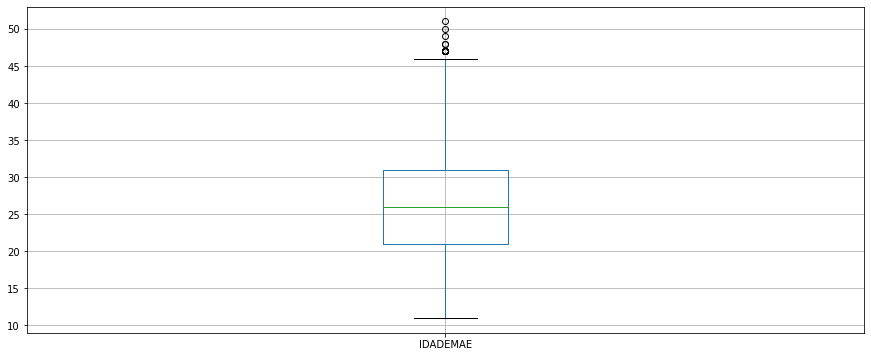

In [122]:
# Fazer o boxplot para idade da mãe e encontrar quais os registro de outliers.

sergipe_df.boxplot(column=['IDADEMAE'], figsize=(15,6))


<AxesSubplot:>

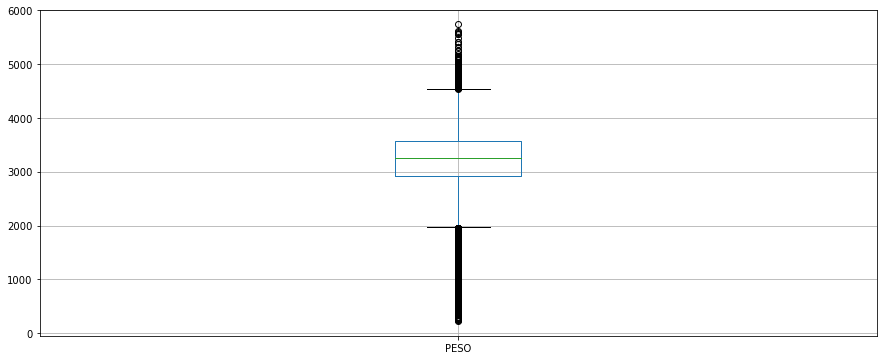

In [123]:
# Fazer o boxplot para o peso da criança e encontrar quais os registro de outliers.

sergipe_df.boxplot(column=['PESO'], figsize=(15,6))

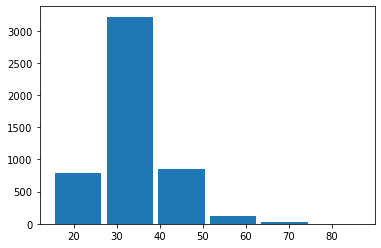

In [124]:
# Fazer o histograma da idade do pai

idade_pai = sergipe_df['IDADEPAI'].dropna()

plt.hist(idade_pai, 6, rwidth=0.9)
plt.show()

<AxesSubplot:>

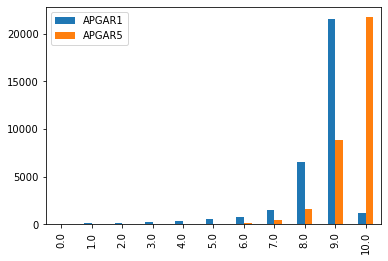

In [125]:
# Representar visualmente os diferentes valores de APGAR1 e APGAR5
freq_apgar1 = sergipe_df.groupby('APGAR1').count()
freq_apgar5 = sergipe_df.groupby('APGAR5').count()

apgar = pd.DataFrame(data={'APGAR1':freq_apgar1['contador'],'APGAR5':freq_apgar5['contador']})
apgar.plot(kind='bar')


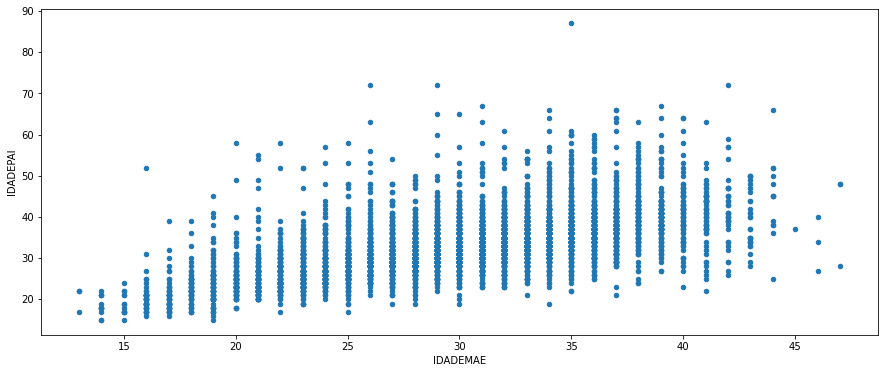

In [126]:
# Mostrar a dispersão entre idade do pai e idade da mãe

idades = sergipe_df[['IDADEMAE', 'IDADEPAI']]
disp = idades.plot(kind='scatter', x= 'IDADEMAE', y= 'IDADEPAI', figsize=(15,6))

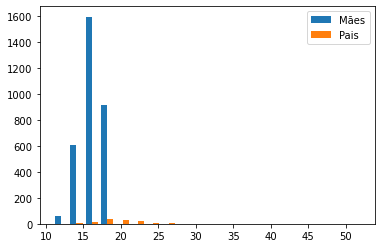

In [127]:
# Mostrar visualmente a comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos

maes_solteiras = sergipe_df[(sergipe_df['ESTCIVMAE'] == 1) & (sergipe_df['IDADEMAE'] <= 18)]
#print(maes_solteiras)

plt.hist([maes_solteiras['IDADEMAE'], maes_solteiras['IDADEPAI']], bins=20, label=['Mães', 'Pais'])
plt.legend(loc='upper right')
plt.show()

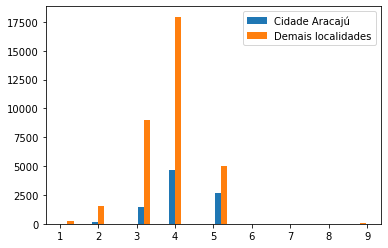

In [134]:
# Comparar a frequência dos anos de escolaridade das mães para que residem na capital (Aracajú, CODMUNRES 2800308) e das mães em outras cidades (outros CODMUNRES).

maes_aracaju = sergipe_df[(sergipe_df['CODMUNRES'] == 280030)]

plt.hist([maes_aracaju['ESCMAE'].dropna(), sergipe_df['ESCMAE'].dropna()], bins=20, label=['Cidade Aracajú', 'Demais localidades'])
plt.legend(loc='upper right')
plt.show()